# Iris Flowers Classification ML Project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
names=['sepal_length','sepal_width','petal_length','petal_width','class']
df=pd.read_csv("iris.csv",names=names)


In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [8]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

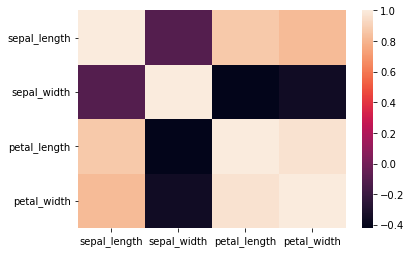

In [9]:
sns.heatmap(df.corr())

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

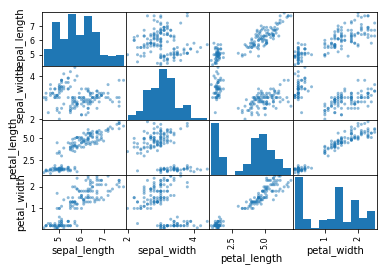

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

sepal_length       AxesSubplot(0.125,0.536818;0.227941x0.343182)
sepal_width     AxesSubplot(0.398529,0.536818;0.227941x0.343182)
petal_length    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
petal_width           AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

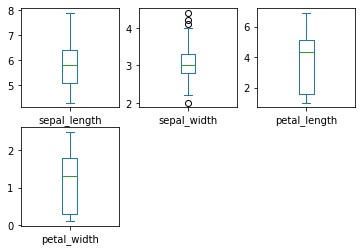

In [11]:
df.plot(kind='box',subplots=True,layout=(2,3))

In [12]:
def remove_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    low_range=q1-(1.5*iqr)
    up_range=q3+(1.5*iqr)
    return low_range,up_range
low_ra,up_ra=remove_outliers(df['sepal_width'])
df['sepal_width']=np.where(df['sepal_width']>up_ra,up_ra,df['sepal_width'])
df['sepal_width']=np.where(df['sepal_width']<low_ra,low_ra,df['sepal_width'])

sepal_length       AxesSubplot(0.125,0.536818;0.227941x0.343182)
sepal_width     AxesSubplot(0.398529,0.536818;0.227941x0.343182)
petal_length    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
petal_width           AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

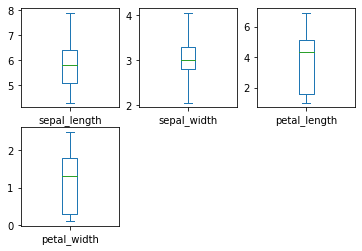

In [13]:
df.plot(kind='box',subplots=True,layout=(2,3))

In [14]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [15]:
rf=RandomForestClassifier()

In [16]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['class']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)


In [17]:
rf=rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)


In [19]:
metrics.confusion_matrix(ytest,ypred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

# ACCURACY

In [18]:
metrics.accuracy_score(ytest,ypred)

0.9736842105263158